## Empirical Exercise 1: The Taylor Rule in the COVID era

For class, you read Ben Bernanke’s reply to John Taylor’s criticism of his monetary policy choices. In his rebuttal, Bernanke argues that his policy choices largely mirror what would be produced from an updated Taylor rule. In class we replicated the original Taylor rule.

- _Read_: Ben Bernanke [The Taylor Rule: A benchmark for monetary policy?](https://www.brookings.edu/articles/the-taylor-rule-a-benchmark-for-monetary-policy/) Bernanke’s post provides the formula for the appropriate Fed Funds rate as a function of the output gap and the core PCE deflator.

Your job today is to understand what monetary policy choices Chair Powell should be making in the wave of the COVID crisis and the ensuring surge in inflation. In one graph, compare (1) the actual Fed Funds Rate to (2) that predicted by Bernanke’s updated formula (which uses the core PCE deflator and a different coefficient on the output gap). Graph the actual path for the fed funds rate compared to the updated Taylor rule on a well labeled chart from 1993 to today.

Then, in a few short sentences, describe the implications of your analysis. Is Jerome Powell making the right choices? Is the fed funds rate at the right level? Why or why not?

### Step 0: Download Macroeconomic Time Series Data from FRED

You will need to collect five quarterly macroeconomic indicators from FRED (Federal Reserve Economic Data). 

Within FRED, assemble all five variables into one graph. Make sure the data are at a quarterly frequency. 
The GDP Deflator and Core PCE Price Index should be expressed as the percent change from a year ago. 

Download the resulting data as a `CSV file`, which you will later load into your Python script.

##### Required Series (with Suggested FRED Codes):

1. **Federal Funds Rate**  [FEDFUNDS](https://fred.stlouisfed.org/series/FEDFUNDS)  
   *(quarterly, average interest rate in percent)*

2. **GDP Deflator**  [GDPDEF](https://fred.stlouisfed.org/series/GDPDEF)  
   *(quarterly, percent change from a year ago)*

3. **Core PCE Inflation**  [PCEPILFE](https://fred.stlouisfed.org/series/PCEPILFE)  
   *(quarterly, percent change from a year ago)*

4. **Nominal GDP**  [GDP](https://fred.stlouisfed.org/series/GDP)  

5. **Nominal Potential GDP**  [NGDPPOT](https://fred.stlouisfed.org/series/NGDPPOT)  

Save the resulting file as `fredgraph.csv' in the same directory as your jupyter notebook.  


### Step 1: Import Libraries
Now we can switch to Python.
We start by importing the `pandas` library for data manipulation,  `matplotlib.pyplot` for creating visualizations, and itables. (If you don't have itables, you need to install it.) 

Use this code to load in necessary libraries:

```python
!pip install dtale

import pandas as pd
import matplotlib.pyplot as plt

#for vizualizing the data using D-Tale
import dtale 


In [71]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load In the Data

To load the FRED data into a Python dataframe we will use the read_csv() function from the pandas library (pd is the standard alias).

This function reads the file named 'fredgraph.csv' from the current working directory. By default, it assumes the first row contains column headers (variable names). In essence, it parses the file into a pandas DataFrame that represents a familiar a 2D Excel table-like structure ideal for data analysis.

```python
df = pd.read_csv('fredgraph.csv')
```

To check that it worked and to get a sense of the data we can write:  
```python
df.head()
df.tail()
```

Alternatively, we can use D-Tale to explore the DataFrame
```python
d = dtale.show(df)
d.open_browser()  # Opens in your default web browser
```

Looking at the data (in D-Tale) is a useful way to check that the data you've imported is what you expect. 
However, good coding practice is to have the Python code itself check that the data is accurate. 

For example, this code verifies expected columns exist and generates an error if not.
```python
expected = {'observation_date', 'GDPDEF', 'PCEPILFE', 'FEDFUNDS', 'GDP', 'NGDPPOT'}
missing = expected - set(df.columns)
assert not missing, f"Missing columns from FRED CSV: {missing}\nDouble-check series names and transformations."
```



In [72]:
df = pd.read_csv('/Users/elliot/Desktop/QAMO5140/EE1/fredgraph1.csv')

#df = df.merge(fed_funds_quarterly, on='Quarter', how='left', suffixes=('', '_from_fed'))
df.columns


Index(['observation_date', 'FEDFUNDS', 'GDPDEF_PC1', 'PCEPILFE_PC1', 'NGDPPOT',
       'GDP'],
      dtype='object')

### Step 3: Clean the Data

Now that we have the data imported into Python, it's time to clean it up and make it useful for analysis.
We have three main steps here:
1. Convert dates into a usable format.
2. Filter the dataset to keep only the time period we care about (starting at Q1 of 1993 and ending at Q4 of 2025).
3. Drop any rows that are missing key series so that later calculations won't break.

##### Convert and Extract Time Periods

Convert the 'observation_date' column (which is read in as text) into a pandas datetime object.
This allows us to easily sort and extract date parts like year, month, or quarter.

```python 
df['Date'] = pd.to_datetime(df['observation_date'])
```

 Sort the dataset by date just in case the CSV was not in order, and reset the row index to match.
```python
df = df.sort_values('Date').reset_index(drop=True)
```

Create a new column called 'Quarter' that stores the date as a pandas Period object in quarterly frequency.
This gives us values like 1993Q1, 2005Q3, etc., which are much easier to work with for time series.
```python
df['Quarter'] = df['Date'].dt.to_period('Q')
```

##### Filter the Dataset to the Analysis Window

Keep only rows where the quarter is between 1993Q1 and 2025Q4.
We use pandas Period objects for direct comparison rather than string matching or extracting the year separately.
```python 
df = df[(df['Quarter'] >= pd.Period('1993Q1')) & 
        (df['Quarter'] <= pd.Period('2025Q4'))].copy()
```
Note: This approach ensures we keep exactly the quarters we want,
even if the dataset includes monthly data or starts before 1993.

##### Drop Missing Values

We want to ensure that all the variables we will use later are available for each row.
Here, replace the list inside 'subset=[...]' with the actual series names you downloaded from FRED.
In practice, if we drop missing GDP data, we drop all missing data. 

```python
df = df.dropna(subset=['GDP'])
```

##### Preview the Cleaned Dataset

To check that our cleaning steps worked, we can preview the dataset using Dtale.
Let's  scroll through the data and confirm:
Dates start at 1993Q1
All key variables have valid values
There are no unexpected gaps in the series

```python
d = dtale.show(df)
```

In [73]:
# Convert and Extract Time Periods
df['Date'] = pd.to_datetime(df['observation_date'])

# Sort the dataset by date and reset index
df = df.sort_values('Date').reset_index(drop=True)

# Create quarterly period column
df['Quarter'] = df['Date'].dt.to_period('Q')

# Filter the Dataset to the Analysis Window (1993Q1 to 2025Q4)
df = df[(df['Quarter'] >= pd.Period('1993Q1')) & 
        (df['Quarter'] <= pd.Period('2025Q4'))].copy()


df = df.dropna(subset=['GDP'])

# Preview the cleaned dataset
print(f"Dataset shape after cleaning: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
df.head()

Dataset shape after cleaning: (130, 8)
Date range: 1993-01-01 00:00:00 to 2025-04-01 00:00:00


,observation_date,FEDFUNDS,GDPDEF_PC1,PCEPILFE_PC1,NGDPPOT,GDP,Date,Quarter
184,1993-01-01,3.04,2.36000,2.74829,6829.816196,6729.459,1993-01-01,1993Q1
185,1993-04-01,3.00,2.35388,2.80269,6915.289610,6808.939,1993-04-01,1993Q2
186,1993-07-01,3.06,2.46018,2.76865,7002.222230,6882.098,1993-07-01,1993Q3
187,1993-10-01,2.99,2.31536,2.54579,7087.128935,7013.738,1993-10-01,1993Q4
188,1994-01-01,3.21,2.23172,2.30567,7168.798556,7115.652,1994-01-01,1994Q1


### Step 4: Calculate the Output Gap and Interest Rate Rules

Now that your data is in wide format, you can create new columns based on economic formulas used in monetary policy analysis. This step involves computing the **output gap**, the **standard Taylor Rule**, and **Bernanke's modified Taylor Rule**.

#### Output Gap Formula

- The `output gap` measueres how far actual GDP deviates from potential GDP (as a %):

```python
df['Output_Gap'] = 100 * (df['GDP'] - df['NGDPPOT']) / df['NGDPPOT']
```

#### Standard Taylor Rule

- The `Standard Taylor Rule` is tool used by central banks used to adjust the interest rate. The formula is:
$$
i = \pi + 0.5(y - y^*) + 0.5(\pi - 2) + 2
$$

```python
df['Taylor_Rule'] = df['GDPDEF'] + 0.5 * df['Output_Gap'] + 0.5 * (df['GDPDEF'] - 2) + 2
```

#### Bernanke's Modified Taylor Rule

Repeat the method above to construct a variable "Bernanke_Taylor_Rule" that uses Bernanke's formulation for the correct path of the Red Funds Rate. 

In [74]:
df.columns

Index(['observation_date', 'FEDFUNDS', 'GDPDEF_PC1', 'PCEPILFE_PC1', 'NGDPPOT',
       'GDP', 'Date', 'Quarter'],
      dtype='object')

In [75]:
df['Output_Gap'] = 100 * (df['GDP'] - df['NGDPPOT']) / df['NGDPPOT']

df['Taylor_Rule'] = df['GDPDEF_PC1'] + 0.5 * df['Output_Gap'] + 0.5 * (df['GDPDEF_PC1'] - 2) + 2

df['Bernanke_Taylor_Rule'] = df['PCEPILFE_PC1'] + .5 * df['Output_Gap'] + .5 * (df['PCEPILFE_PC1'] - 2) + 2


# Display summary statistics
print("Summary of calculated variables:")
print(df[['Output_Gap', 'Taylor_Rule', 'Bernanke_Taylor_Rule']].describe())

Summary of calculated variables:
       Output_Gap  Taylor_Rule  Bernanke_Taylor_Rule
count  130.000000   130.000000            130.000000
mean    -0.541574     4.026611              3.797078
std      1.928107     2.400671              1.975064
min     -9.126091    -2.479881             -2.131206
25%     -1.638975     2.447449              2.457375
50%     -0.176891     3.867603              3.862482
75%      0.964579     5.213942              4.506278
max      2.451953    12.815515              9.761519


### Step 5: Set Up Custom X-Axis Tick Labels for Plotting

When plotting time series data, it's often helpful to show only a subset of labels (e.g., Q1 of each year) to avoid clutter.
This segment prepares the x-axis values and labels accordingly.

##### Generate X-Axis Values and Labels

First, it's easier to label the x-axis if the quarter variable is stored as a string in the format 'YYYYQ#'.
We already created a 'Quarter' column (as a pandas Period) in Step 3, so here we create a string version for labeling.

```python
df['Year_Quarter'] = df['Quarter'].astype(str)
```

Create a list of numeric positions (0, 1, 2, ..., n) for plotting on the x-axis.
```python
x_vals = list(range(len(df)))
```
Create a list of all the Year_Quarter labels in order (e.g., '1993Q1', '2020Q3', etc.).
```python
x_labels = df['Year_Quarter'].tolist()
```
`x_vals` will be used for positioning points on the plot.
`x_labels` contains the actual quarter labels we can use to customize tick marks.

##### Highlight Only Q1 Observations for Clean Ticks

Identify the index positions in the time series where the quarter is Q1 (the first quarter of each year).
```python
q1_indices = [i for i, q in enumerate(x_labels) if q.endswith('Q1')]
```
Select just those Q1 labels to use as tick marks on the x-axis for a cleaner, more readable timeline.
```python
q1_labels = [x_labels[i] for i in q1_indices]
```

In [76]:
df['Year_Quarter'] = df['Quarter'].astype(str)
x_vals = list(range(len(df)))


x_labels = df['Year_Quarter'].tolist()


q1_indices = [i for i, q in enumerate(x_labels) if q.endswith('Q1')]

q1_labels = [x_labels[i] for i in q1_indices]

print(f"Total quarters: {len(x_vals)}")
print(f"Q1 tick marks: {len(q1_indices)}")
print(f"First few Q1 labels: {q1_labels[:5]}")

Total quarters: 130
Q1 tick marks: 33
First few Q1 labels: ['1993Q1', '1994Q1', '1995Q1', '1996Q1', '1997Q1']


### Step 6: Plot the Federal Funds Rate vs. the Taylor Rule

This step visualizes how the **actual Federal Funds Rate** compares to the **predicted rate from the Taylor Rule** over time. The graph helps illustrate periods when the Fed's interest rate policy was looser or tighter than what the Taylor Rule would suggest.

##### Plotting Instructions

```python
plt.figure(figsize=(12, 6))
plt.plot(x_vals, df['FEDFUNDS'], label='Fed Funds Rate')
plt.plot(x_vals, df['Taylor_Rule'], label='Taylor Rule')
plt.xticks(ticks=q1_indices, labels=q1_labels, rotation=45)
plt.xlabel('Year-Quarter', size=15)
plt.ylabel('Rate (%)', size=15)
plt.title('Fed Funds Rate vs Taylor Rule (All Quarters, Labels for Q1 Only)', size=20)
plt.legend(True)
plt.grid(True)
plt.tight_layout()
plt.show()
```

##### Explanation

- Since this may be your first time plotting graphs with `matplotlib`, heres a step by step breakdown:
  - `plt.figure` sets the figure to 12 inches wide by 6 inches tall
  - `plt.plot` plots two lines, one for the **actual Federal Funds Rate** and the **Taylor Rule Rate**
  - `plt.xticks` customizes the x-axis to only show Q1 labels, and even rotates them 45 degrees
  - `plt.xlabel` plots the size and text of the horizontal label, `plt.ylabel` does the same for the vertical
  - `plt.title` sets the size and text of the title label
  - `plt.legend` turns the legend on or off, likewise with `plt.grid`
  - `plt.tight_layout()` helps reduce clutter
  - and `plt.show` displays the graph
- There are a ton of different options within these simple commands to help improve the visual quality of your graphs. You are encouraged to use outside resources, such as ChatGPT or matplotlib documentation to make your graphs more visually appealling.

##### Export the Chart
Make sure to save your plot as an image or PDF. You can do this using:

```python
plt.savefig("taylor_rule_chart.png", dpi=300, bbox_inches='tight')
```

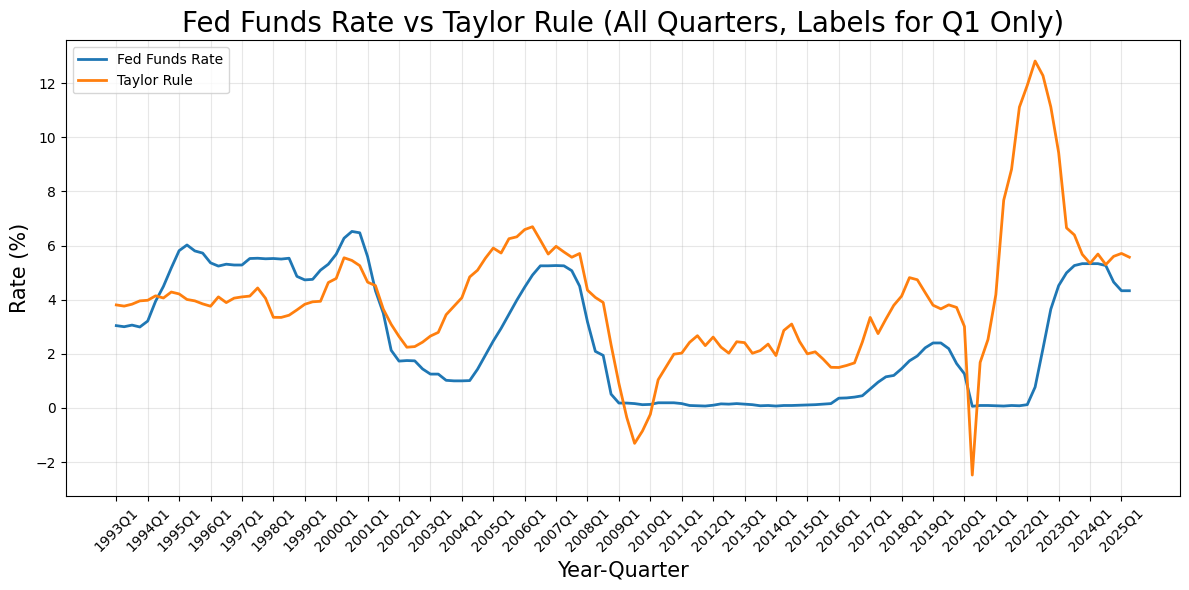

Chart saved as 'taylor_rule_chart.png'


<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(x_vals, df['FEDFUNDS'], label='Fed Funds Rate', linewidth=2)
plt.plot(x_vals, df['Taylor_Rule'], label='Taylor Rule', linewidth=2)
plt.xticks(ticks=q1_indices, labels=q1_labels, rotation=45)
plt.xlabel('Year-Quarter', size=15)
plt.ylabel('Rate (%)', size=15)
plt.title('Fed Funds Rate vs Taylor Rule (All Quarters, Labels for Q1 Only)', size=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save the chart
plt.savefig("taylor_rule_chart.png", dpi=300, bbox_inches='tight')
print("Chart saved as 'taylor_rule_chart.png'")

### Step 7: Your job is to plot the Federal Funds Rate vs. Bernanke's Modified Taylor Rule

Modify the code above to compare the **actual Federal Funds Rate** to the rate implied by **Bernanke’s modified Taylor Rule**.


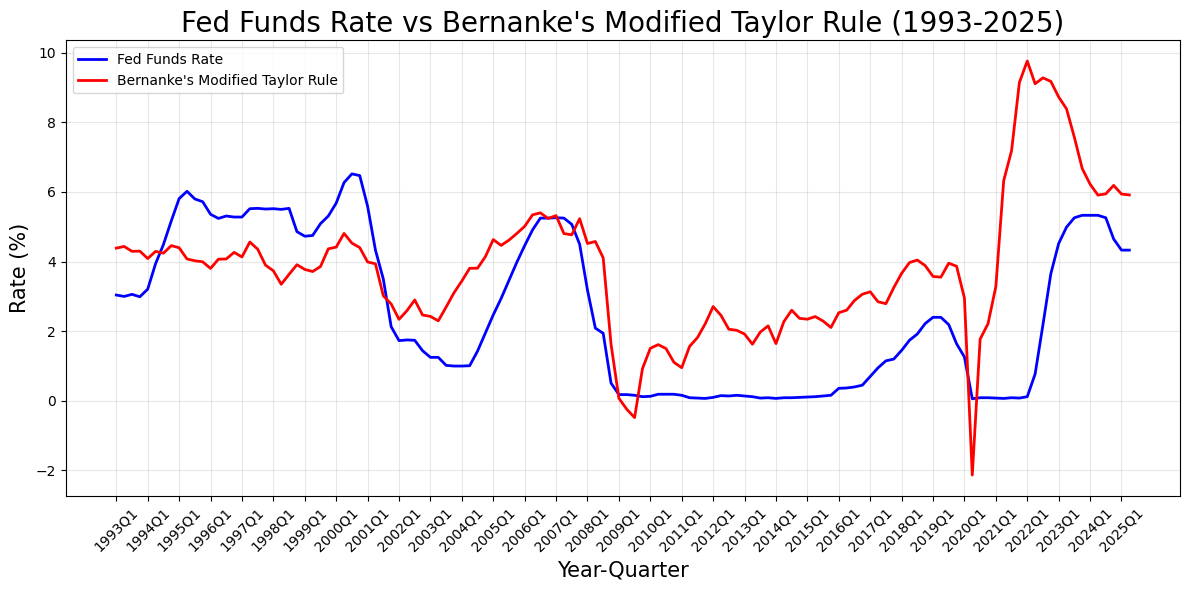

Chart saved as 'bernanke_taylor_rule_chart.png'


<Figure size 640x480 with 0 Axes>

In [78]:

plt.figure(figsize=(12, 6))
plt.plot(x_vals, df['FEDFUNDS'], label='Fed Funds Rate', linewidth=2, color='blue')
plt.plot(x_vals, df['Bernanke_Taylor_Rule'], label="Bernanke's Modified Taylor Rule", linewidth=2, color='red')
plt.xticks(ticks=q1_indices, labels=q1_labels, rotation=45)
plt.xlabel('Year-Quarter', size=15)
plt.ylabel('Rate (%)', size=15)
plt.title("Fed Funds Rate vs Bernanke's Modified Taylor Rule (1993-2025)", size=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save the chart
plt.savefig("bernanke_taylor_rule_chart.png", dpi=300, bbox_inches='tight')
print("Chart saved as 'bernanke_taylor_rule_chart.png'")

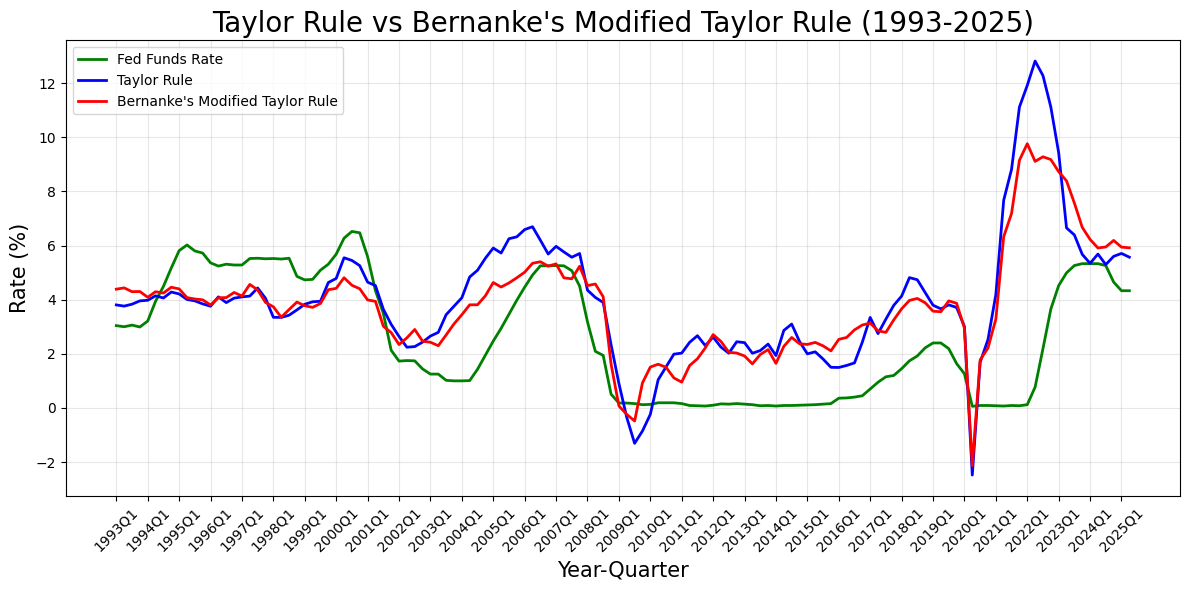

Chart saved as 'bernanke_taylor_rule_chart.png'


<Figure size 640x480 with 0 Axes>

In [79]:

plt.figure(figsize=(12, 6))
plt.plot(x_vals, df['FEDFUNDS'], label='Fed Funds Rate', linewidth=2, color='green')
plt.plot(x_vals, df['Taylor_Rule'], label='Taylor Rule', linewidth=2, color='blue')
plt.plot(x_vals, df['Bernanke_Taylor_Rule'], label="Bernanke's Modified Taylor Rule", linewidth=2, color='red')
plt.xticks(ticks=q1_indices, labels=q1_labels, rotation=45)
plt.xlabel('Year-Quarter', size=15)
plt.ylabel('Rate (%)', size=15)
plt.title("Taylor Rule vs Bernanke's Modified Taylor Rule (1993-2025)", size=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save the chart
plt.savefig("bernanke_taylor_rule_chart.png", dpi=300, bbox_inches='tight')
print("Chart saved as 'bernanke_taylor_rule_chart.png'")

### Step 8: Interpret the Results

In a few sentences, reflect on the comparison between the **actual Federal Funds Rate** and the two **Taylor Rule estimates** you plotted:

- **Is Jerome Powell making the right choices?**  
  Consider whether the Fed's rate decisions align with the policy rules, especially during periods of inflation or recession.

- **Is the Federal Funds Rate too high or too low?**  
  Refer to the **standard Taylor Rule** and **Bernanke’s modified rule**. If the actual rate is consistently below the rule, it may suggest the Fed is being too accommodative. If it's above, the Fed might be fighting inflation aggressively.

- **Support your claim with evidence**  
  Use patterns you observed in your plots. Mention specific time periods if relevant.

In PDF file submitted. 

### Step 9: Export Your Work for Submission

Your final product should be a **one-page summary brief** that includes:

- A clean, high-quality chart comparing the **Federal Funds Rate** to the ***Ben Bernanke Estimate*** or both Taylor Rule estimates
- Your short written interpretation (see Step 9)